# Travaux Pratiques de Modélisation Géologique et Géostatistique
O. Kaufmann - 2018 - 2020; O. Kaufmann & Q. Campeol, 2022-2023.
## Séance 5

***
## 1. Chargement des packages

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.1 Imports</b>
</div>

In [15]:
# @info: Exécutez-moi pour activer les questions interactives
# -----------------------------------------------------------

from IPython.display import HTML
import codecs

# @hidden
HTML('''
<script>
code_show=true;
function code_toggle() {
 if (code_show){
  $('.cm-comment:contains(@hidden)').closest('div.input').hide();
 } else {
  $('.cm-comment:contains(@hidden)').closest('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<div># @info: Exécutez-moi pour activer les questions interactives </div>
''')

# @info: Exécutez-moi pour cacher le code, puis sauvegardez le notebook


In [16]:
%load_ext rpy2.ipython
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rpy2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>1.2 Installer et charger les packages <i>raster</i>, <i>rgdal</i> et <i>gstat</i> </b>
</div>

- Si nécessaire, installez les <b>packages</b> manquants

install.packages(c('sp', 'gstat'))

- Chargez les <b>packages</b> <i>sp</i>, <i>raster</i> et <i>gstat</i>

In [17]:
%%R

library(sp)
library(raster)
library(gstat)

<div class="alert alert-block alert-info">
<b>Info:</b><br>     La documentation de gstat est accessible <a href="http://cran.r-project.org/web/packages/gstat/gstat.pdf">ici</a>.
</div>

***
## 2. Rappel TP3 : chargement et mise en forme du jeu de données <i>Robena Mine (US, Penn) coal ash</i> 
### Jeu de données contenu dans le package <i>gstat</i>
Data obtained from Gomez and Hazen (1970, Tables 19 and 20) on coal ash for the Robena Mine Property in Greene County Pennsylvania.

In [18]:
%%R -o coalash

data(coalash)

In [19]:
robena = coalash.drop(coalash[coalash['coalash'] == max(coalash["coalash"])].index)
print(f'Variance avant suppression du déviant : {coalash["coalash"].var():.3f}%²')
print(f'Variance après suppression du déviant : {robena["coalash"].var():.3f}%²')

Variance avant suppression du déviant : 1.629%²
Variance après suppression du déviant : 1.338%²


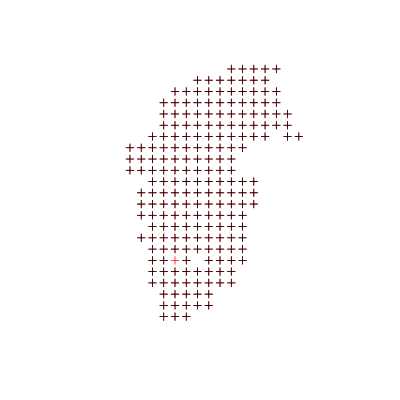

In [20]:
%%R -i robena -w 400 -h 400

coordinates(coalash) = ~x+y
coordinates(robena) = ~x+y

plot(coalash, col="#ff0000")
plot(robena, add=TRUE)

In [21]:
gdf_coalash = gpd.GeoDataFrame(coalash, geometry=gpd.points_from_xy(coalash['x'], coalash['y']) )
gdf_robena = gpd.GeoDataFrame(robena, geometry=gpd.points_from_xy(robena['x'], robena['y']) )

***
## 3. Préparation des outils pour la représentation des résultats sur carte

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>3.1 Créer une grille pour les prédictions</b>
</div>

In [22]:
import rasterio as rio
from rasterio import Affine, features
from rasterio.plot import show
from rasterio.mask import mask

- Construisez une aire englobant les points d'échantillonnage à l'aide un buffer de rayon 2 autour de l'enveloppe convexe des points d'échantillonnage

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Décomposez le problème en plusieurs étapes. Commencez par constuire une <b>géométrie</b> réunissant les <b>géoséries</b> des points d'échantillonages du <b>GeoDataFrame</b>. Construisez ensuite <b>l'enveloppe convexe</b> de cette géométrie et appliquez-y un <b>buffer</b> de rayon souhaité.
</div>

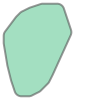

In [ ]:
# Résultat attendu ci-dessous...

- Construire la grille d'estimation suppose de choisir une résolution, fixez le nombre de pixels par unité de longueur à 10

- déterminez le nombre de lignes et colonnes nécessaires pour la grille 

- À partir des informations obtenues dans les deux cellules ci-dessus, déterminez la transformation affine pour passer de l'espace de la grille à l'espace des coordonnées du jeu de données

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la fonction <b>Affine</b> de la librairie <code>Rasterio</code>.
</div>

- *Rasterisez* le masque utilisé pour déterminer les pixels de la grille où une évaluation devra être faite

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez une méthode de la classe <b>features</b> de la librairie <code>Rasterio</code> pour rasteriser la grille et sauvegardez ce raster dans un fichier <i>robena_estimation_grid.tif</i>.
</div>

- Représentez sur une même figure les points d'échantillonnage et la grille d'évaluation

<AxesSubplot:>

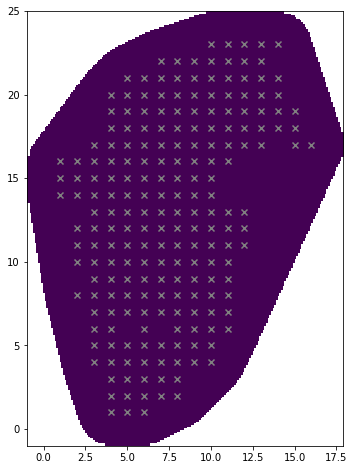

In [ ]:
# Résultat attendu ci-dessous...

***
## 4. Calculer le variogramme expérimental et ajuster un modèle de variogramme théorique

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Examinez ce que font les fonctions <i>variogram</i> et <i>vgm</i> du <b>package</b> <i>gstat</i>
</div>

In [29]:
%%R

?variogram

File: /tmp/RtmpDvqdFo/Rtxt875c7aa7e9d8
variogram                package:gstat                 R Documentation



_C_a_l_c_u_l_a_t_e _S_a_m_p_l_e _o_r _R_e_s_i_d_u_a_l _V_a_r_i_o_g_r_a_m _o_r _V_a_r_i_o_g_r_a_m _C_l_o_u_d



_D_e_s_c_r_i_p_t_i_o_n:



     Calculates the sample variogram from data, or in case of a linear

     model is given, for the residuals, with options for directional,

     robust, and pooled variogram, and for irregular distance

     intervals.



     In case spatio-temporal data is provided, the function

     ‘variogramST’ is called with a different set of parameters.



_U_s_a_g_e:



     ## S3 method for class 'gstat'

     variogram(object, ...)

     ## S3 method for class 'formula'

     variogram(object, locations = coordinates(data), data, ...)

     ## Default S3 method:

     variogram(object, locations, X, cutoff, width = cutoff/15,

             alpha = 0, beta = 0, tol.hor = 90/len

In [30]:
%%R
?vgm

File: /tmp/RtmpDvqdFo/Rtxt875c665aeced
vgm                   package:gstat                    R Documentation



_G_e_n_e_r_a_t_e, _o_r _A_d_d _t_o _V_a_r_i_o_g_r_a_m _M_o_d_e_l



_D_e_s_c_r_i_p_t_i_o_n:



     Generates a variogram model, or adds to an existing model.

     ‘print.variogramModel’ prints the essence of a variogram model.



_U_s_a_g_e:



     vgm(psill = NA, model, range = NA, nugget, add.to, anis, kappa = 0.5, ..., covtable,

             Err = 0)

     ## S3 method for class 'variogramModel'

     print(x, ...)

     ## S3 method for class 'variogramModel'

     plot(x, cutoff, ..., type = 'l')

     as.vgm.variomodel(m)

     

_A_r_g_u_m_e_n_t_s:



   psill: (partial) sill of the variogram model component, or model:

          see Details



   model: model type, e.g. "Exp", "Sph", "Gau", "Mat". Calling vgm()

          without a model argument returns a data.frame with available

          models.



   ran

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>4.1 Calculer le variogramme expérimental</b>
</div>

- Calculez le variogramme expérimental pour le jeu de données robena et affichez-le

In [31]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303030223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030302220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d7720343030202d68203430303c62723e0a20203c62723e0a3c62723e0a65787076676d5f726f62656e61203c2d20766172696f6772616d28636f616c6173687e312c20726f62656e61293c62723e0a7072696e742865787076676d5f726f62656e61293c62723e0a706c6f742865787076676d5f726f62656e61290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


     np     dist     gamma dir.hor dir.ver   id
1   365 1.000000 0.9116238       0       0 var1
2   346 1.414214 0.9754467       0       0 var1
3   964 2.155746 0.9927252       0       0 var1
4   296 2.828427 1.0243694       0       0 var1
5   861 3.107620 1.0080100       0       0 var1
6  1308 3.885550 1.0809427       0       0 var1
7   733 4.394176 1.0720051       0       0 var1
8  1129 5.039643 1.1894792       0       0 var1
9  1034 5.611912 1.2688307       0       0 var1
10 1335 6.226178 1.3514909       0       0 var1
11 1012 6.934132 1.3075510       0       0 var1
12  934 7.363933 1.3622869       0       0 var1
13 1235 8.038788 1.3004568       0       0 var1
14  604 8.554835 1.4186204       0       0 var1


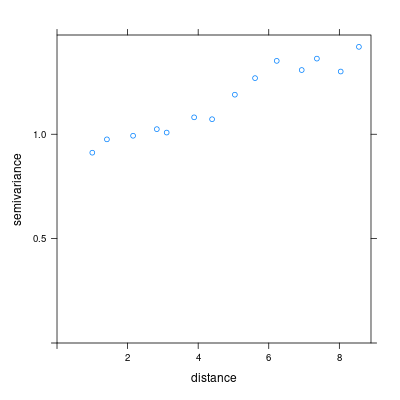

In [ ]:
# Résultat attendu ci-dessous...

- Affichez la nuée variographique associée

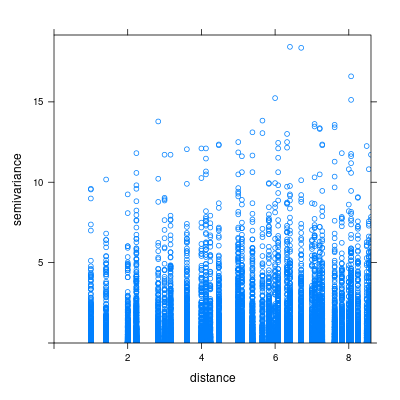

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>4.2 Construire un modèle variographique théorique et l'ajuster</b>
</div>

- Proposez un modèle variographique et comparez-le au variogramme expérimental, testez plusieurs types de modèles adaptés à l'aide de la fonction <code>vgm</code>

In [33]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303031223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030312220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d6f2065787076676d5f726f62656e61202d7720353030202d68203330303c62723e0a20203c62723e0a3c62723e0a726f62656e612e76676d203c2d2076676d287073696c6c3d302e35352c206d6f64656c3d27537068272c2072616e67653d392c206e75676765743d302e38293c62723e0a706c6f742865787076676d5f726f62656e612c206d6f64656c3d726f62656e612e76676d2c20636f6c3d27626c61636b272c206d61696e3d2225206173683a205370682c206e75676765743d302e382c2073696c6c3d302e35352c2072616e67653d3922290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


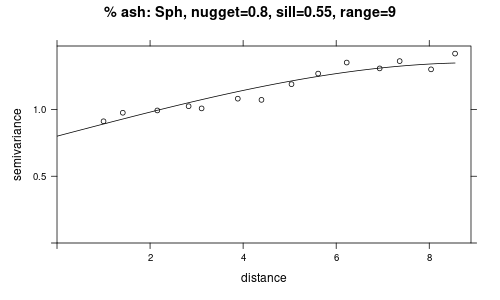

In [ ]:
# Résultat attendu ci-dessous...

- Ajustez un modèle variographique au variogramme expérimental à l'aide de la fonction <code>fit.variogram</code>

In [34]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303032223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030322220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d7720353030202d68203330303c62723e0a20203c62723e0a3c62723e0a726f62656e612e76676d2e666974203d206669742e766172696f6772616d2865787076676d5f726f62656e612c2076676d286e75676765743d382e2c6d6f64656c3d22537068222c2072616e67653d342e35292c206669742e6d6574686f643d32293c62723e0a706c6f742865787076676d5f726f62656e612c206d6f64656c3d726f62656e612e76676d2e6669742c20636f6c3d27626c61636b272c206d61696e3d22252061736822293c62723e0a23706c6f7428726f62656e612e76676d2e6669742c206375746f66663d3230290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


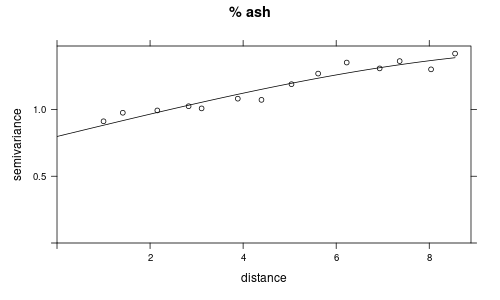

In [ ]:
# Résultat attendu ci-dessous...

- Comparez ces résultats à ceux obtenus avec le jeu de données initial (avec le déviant)

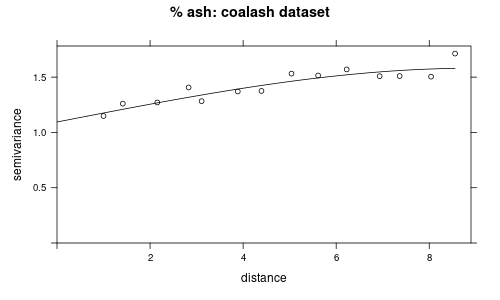

In [ ]:
# Résultat attendu ci-dessous...

- Représentez les deux variogrammes expérimentaux sur un même graphe

In [36]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303033223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030332220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d7720353030202d68203430303c62723e0a20203c62723e0a3c62723e0a6d6174706c6f742865787076676d5f636f616c61736824646973742c65787076676d5f636f616c6173682467616d6d612c20636f6c3d2223666630303030222c20706368203d2031392c20796c696d3d6328302c32292c20786c61623d2268222c20796c61623d2247616d6d6122293c62723e0a6d6174706c6f742865787076676d5f726f62656e6124646973742c65787076676d5f726f62656e612467616d6d612c20706368203d2031392c206164643d54525545290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


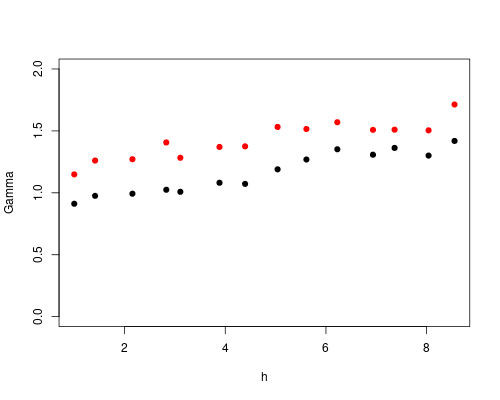

In [ ]:
# Résultat attendu ci-dessous...

***
## 5. Résoudre les équations du krigeage et afficher les résultats sur la grille

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.1 Préparation des outils pour le krigeage</b>
</div>

- gstat nécessite une grille qui soit un objet de la classe **SpatialPixelsDataFrame**. Importez dans l'environnement <code>R</code> le fichier robena_estimation_grid.tif avec la librairie <b>Raster</b>.

In [ ]:
# Résultat attendu ci-dessous...

class      : RasterLayer 
dimensions : 260, 189, 49140  (nrow, ncol, ncell)
resolution : 0.1, 0.1  (x, y)
extent     : -1, 17.9, -1, 25  (xmin, xmax, ymin, ymax)
crs        : NA 
source     : robena_estimation_grid.tif 
names      : robena_estimation_grid 



<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>5.2 Préparation de l'affichage des résultats</b>
</div>

- Ecrivez une fonction **plot_krige_results** pour afficher les résultats sous forme de carte en y superposant les points d'échantillonnage, utilisez une image géoréférencée multi-bandes pour stocker les prédictions et la variance sur les prédictions

In [38]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303034223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030342220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e64656620706c6f745f6b726967655f726573756c747328696d6167655f66696c652c206764662c202a2a6b7761726773293a3c62723e0a202020206669672c206178203d20706c742e737562706c6f74732866696773697a653d2832302c3130292c206e636f6c733d32293c62723e0a20202020636d617073203d206b77617267732e706f702827636d617073272c205b27687376272c2027686f74275d293c62723e0a2020202061785f7469746c6573203d206b77617267732e706f7028277469746c6573272c205b2770726564696374696f6e73272c202776617269616e6365275d293c62723e0a202020206669675f7469746c65203d206b77617267732e706f7028276669675f7469746c65272c202727293c62723e0a202020206669672e7375707469746c65286669675f7469746c652c20666f6e7473697a653d3230293c62723e0a2020202064617461203d205b4e6f6e652c204e6f6e655d3c62723e0a20202020696d203d205b4e6f6e652c204e6f6e655d3c62723e0a20202020776974682072696f2e6f70656e28696d6167655f66696c652c2027722729206173206f75743a3c62723e0a20202020202020207370617469616c5f657874656e74203d205b6f75742e626f756e64732e6c6566742c206f75742e626f756e64732e72696768742c206f75742e626f756e64732e626f74746f6d2c206f75742e626f756e64732e746f705d3c62723e0a2020202020202020666f72206920696e2072616e67652832293a3c62723e0a202020202020202020202020646174615b695d203d206f75742e7265616428692b312c206d61736b65643d54727565293c62723e0a20202020666f72206920696e2072616e67652832293a3c62723e0a2020202020202020696d5b695d203d2061785b695d2e696d73686f7728646174615b695d2c20636d61703d636d6170735b695d2c20657874656e743d7370617469616c5f657874656e742c202a2a6b7761726773293c62723e0a202020202020202061785b695d2e7365745f7469746c652861785f7469746c65735b695d293c62723e0a20202020202020206764662e706c6f742861783d61785b695d2c206d61726b65723d2778272c20636f6c6f723d276772657927293c62723e0a20202020202020206669672e636f6c6f7262617228696d5b695d2c2061783d61785b695d2920203c62723e0a202020206966206669675f7469746c65213d27273a3c62723e0a2020202020202020706c742e73617665666967286669675f7469746c652b272e706e6727290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.3 Krigeage ordinaire</b>
</div>

- Résolvez les équations du krigeage ordinaire et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [39]:
%%R
? krige

File: /tmp/RtmpDvqdFo/Rtxt875c2f9ca0ab
krige                  package:gstat                   R Documentation



_S_i_m_p_l_e, _O_r_d_i_n_a_r_y _o_r _U_n_i_v_e_r_s_a_l, _g_l_o_b_a_l _o_r _l_o_c_a_l, _P_o_i_n_t _o_r _B_l_o_c_k _K_r_i_g_i_n_g,

_o_r _s_i_m_u_l_a_t_i_o_n.



_D_e_s_c_r_i_p_t_i_o_n:



     Function for simple, ordinary or universal kriging (sometimes

     called external drift kriging), kriging in a local neighbourhood,

     point kriging or kriging of block mean values (rectangular or

     irregular blocks), and conditional (Gaussian or indicator)

     simulation equivalents for all kriging varieties, and function for

     inverse distance weighted interpolation.  For multivariable

     prediction, see gstat and predict



_U_s_a_g_e:



     krige(formula, locations, ...)

     krige.locations(formula, locations, data, newdata, model, ..., beta, nmax

     = Inf, nmin = 0, omax = 

In [ ]:
# Résultat attendu ci-dessous...

[using ordinary kriging]


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


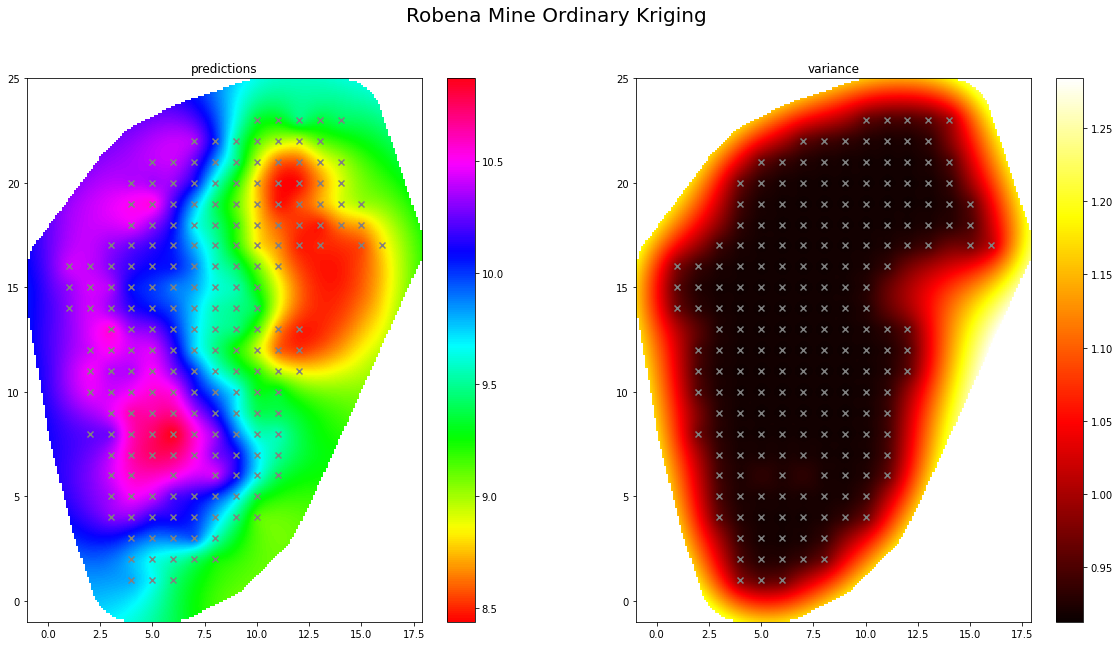

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.4 Krigeage simple</b>
</div>

- Résolvez les équations du krigeage simple et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [ ]:
# Résultat attendu ci-dessous...

[1] "La moyenne des teneurs en cendres du jeu de données est de: 9.74072463768116 %"
[using simple kriging]


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


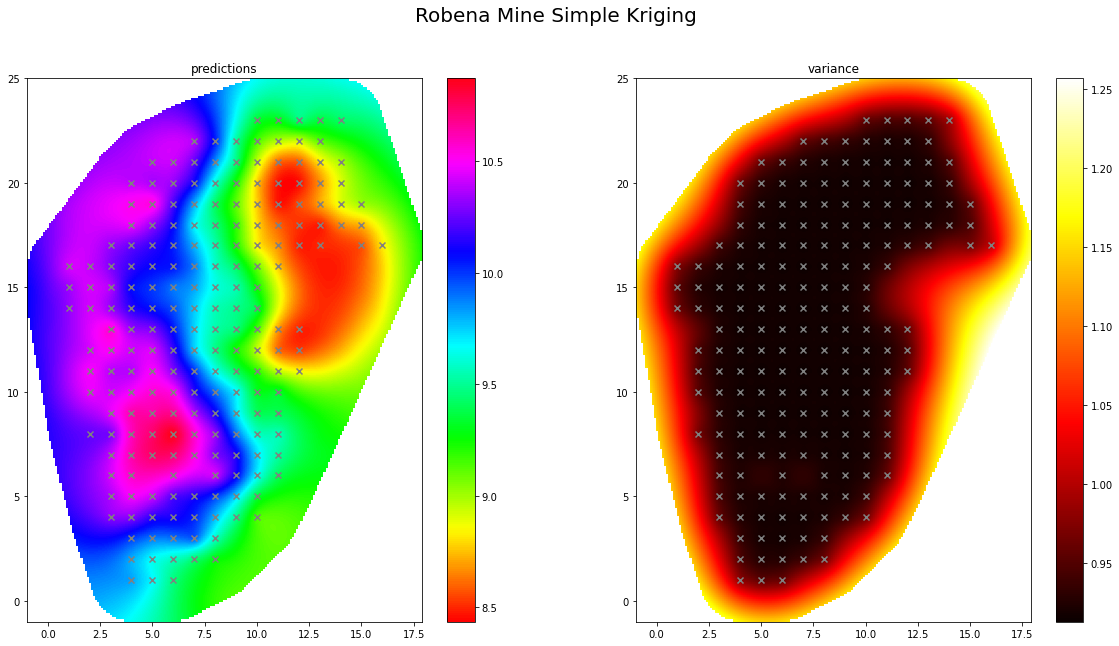

In [ ]:
# Résultat attendu ci-dessous...

- Calculez la différence entre le krigeage simple et le krigeage ordinaire et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [44]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303035223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030352220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e2525523c62723e0a203c62723e0a3c62723e0a726f62656e612e6b7269676524646966662e70726564203c2d20726f62656e612e6b7269676573696d706c6524766172312e70726564202d20726f62656e612e6b7269676524766172312e707265643c62723e0a726f62656e612e6b7269676524646966662e766172203c2d20726f62656e612e6b7269676573696d706c6524766172312e766172202d20726f62656e612e6b7269676524766172312e7661723c62723e0a3c62723e0a696d6167655f66696c65203c2d20272e2f726f62656e615f736b5f6f6b5f646966662e746966273c62723e0a726f62656e615f736b5f6f6b5f64696666203c2d20737461636b28617328726f62656e612e6b726967655b27646966662e70726564275d2c20225261737465724c6179657222292c20617328726f62656e612e6b726967655b27646966662e766172275d2c20225261737465724c617965722229293c62723e0a777269746552617374657228726f62656e615f736b5f6f6b5f646966662c20696d6167655f66696c652c206f76657277726974653d54525545290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)
/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


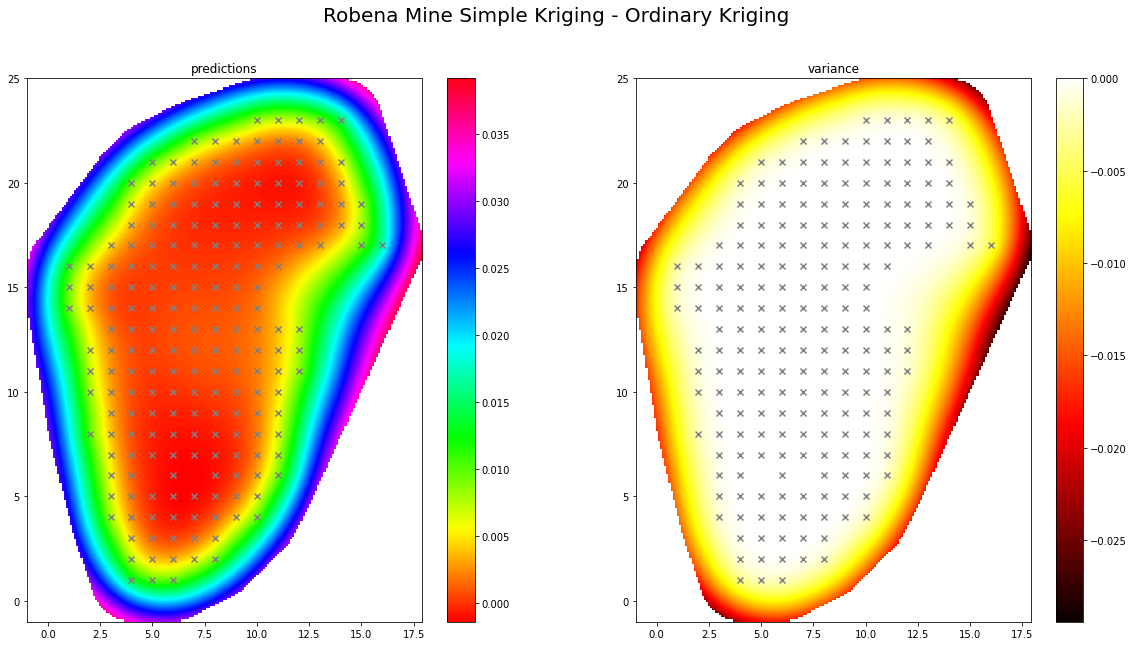

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.5 Krigeage par bloc</b>
</div>

- Résolvez les équations du krigeage ordinaire par blocs pour des blocs de 2x2 et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [ ]:
# Résultat attendu ci-dessous...

[using ordinary kriging]


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


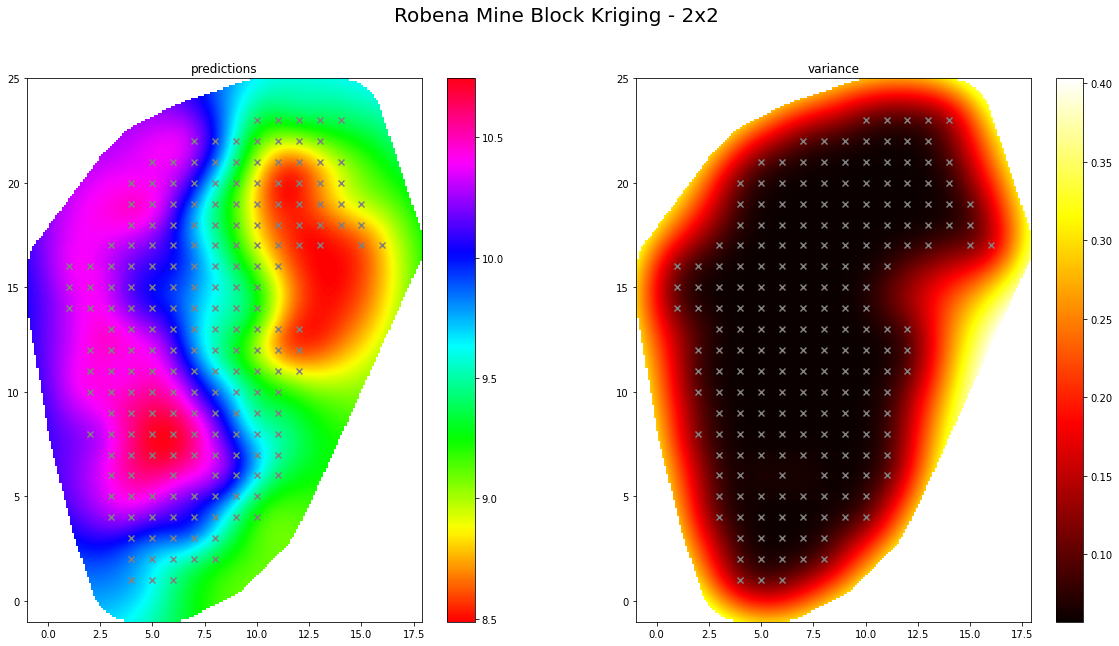

In [ ]:
# Résultat attendu ci-dessous...

- Résolvez les équations du krigeage ordinaire par blocs pour des blocs de 1x4 et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [ ]:
# Résultat attendu ci-dessous...

[using ordinary kriging]


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


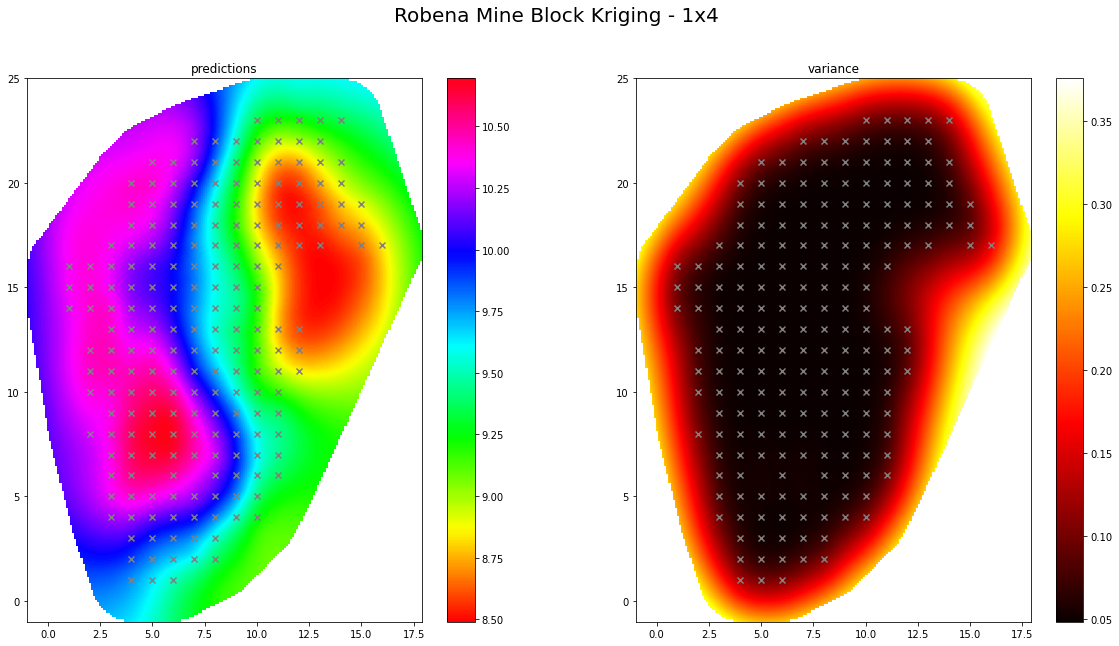

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Quelles différences voyez-vous entre le krigeage ordinaire, le krigeage ordinaire par blocs de 2x2 et celui par blocs de 1x4?
</div>

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.6 Krigeage universel</b>
</div>

- Résolvez les équations du krigeage universel avec une tendance linéaire et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [ ]:
# Résultat attendu ci-dessous...

[using universal kriging]


- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


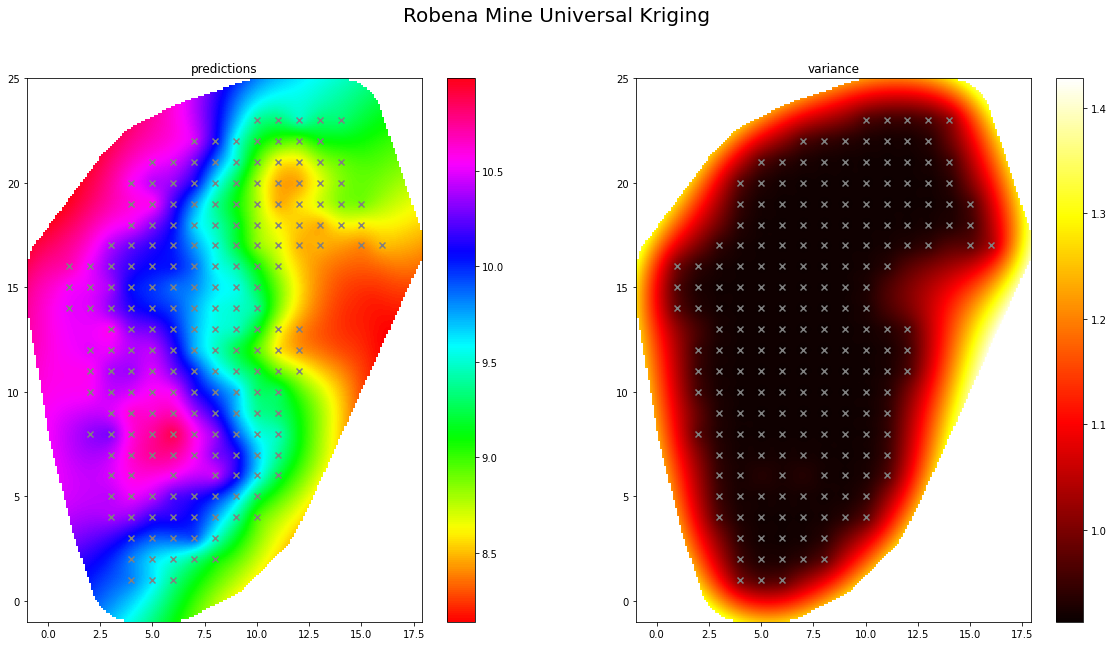

In [ ]:
# Résultat attendu ci-dessous...

- Calculez la différence entre le krigeage universel et le krigeage ordinaire et représentez-la sous forme de cartes

- Affichez les résultats avec la fonction python **plot_krige_results**

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


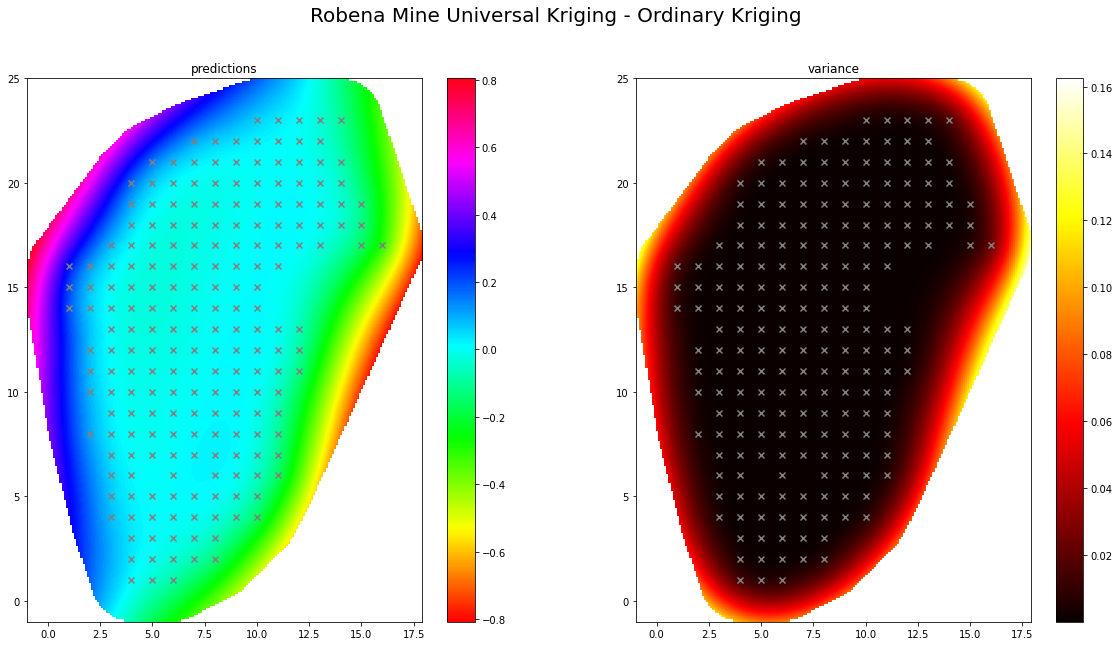

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>5.7 Vérifier la qualité des estimations avec la validation croisée</b>
</div>

<b>Note:</b><br>    La validation croisée vue au cours s'appelle <i>Leave-One-Out Cross-Validation</i> (<i>LOOCV</i>). Il existe aussi d'autres stratégies de validation croisée.


- Effectuez une validation croisée pour l'estimation par krigeage ordinaire à l'aide de la fonction <code>krige.cv</code>

In [ ]:
# Résultat attendu ci-dessous...

  |======================================================================| 100%
class       : SpatialPointsDataFrame 
features    : 207 
extent      : 1, 16, 1, 23  (xmin, xmax, ymin, ymax)
crs         : NA 
variables   : 6
names       :        var1.pred,          var1.var, observed,          residual,            zscore, fold 
min values  : 8.37106696024567, 0.929797777321555,        7, -2.41487956974661, -2.47925786697669,    1 
max values  : 10.8020070469255,  1.09238669829171,    13.07,  3.16880151642556,   3.2723855401555,  207 


- Affichez la distribution spatiale des résidus calculés par validation croisée

In [55]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303036223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030362220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e646566207363616c655f73796d626f6c7328782c20613d3530293a3c62723e0a2020202072657475726e206e702e61627328612a78293c62723e0a3c62723e0a64656620636f6c6f725f73796d626f6c7328782c20706f7369746976655f636f6c6f723d2767272c206e656761746976655f636f6c6f723d276d27293a3c62723e0a2020202072657475726e206e702e6172726179285b6e656761746976655f636f6c6f722069662069203c302e20656c736520706f7369746976655f636f6c6f7220666f72206920696e20785d293c62723e0a3c62723e0a4d203d20352023206e756d626572206f662062696e733c62723e0a62696e73203d205b6e702e7175616e74696c652863765f6f6b2e726573696475616c2c20692f284d2d31292920666f72206920696e2072616e676528302c4d295d3c62723e0a67726f75706564203d2063765f6f6b2e67726f75706279286e702e6469676974697a652863765f6f6b2e726573696475616c2c2062696e7329293c62723e0a203c62723e0a232043726561746520736f6d652073697a65732c206c6162656c7320616e6420736f6d6520636f6c6f72733c62723e0a73697a6573203d205b7363616c655f73796d626f6c7328692920666f72206920696e2062696e735d3c62723e0a6c6162656c73203d205b66277b693a2b2e33667d20252720666f72206920696e2062696e735d3c62723e0a636f6c6f7273203d20636f6c6f725f73796d626f6c732862696e73293c62723e0a203c62723e0a6669672c206178203d20706c742e737562706c6f74732866696773697a653d28362c3629293c62723e0a232067657420746865206c6567656e642068616e646c657320616e64206c6162656c733c62723e0a666f7220692c20286e616d652c2067726f75702920696e20656e756d65726174652867726f75706564293a3c62723e0a2020202061782e736361747465722867726f75702e782c2067726f75702e792c20733d73697a65735b695d2c20616c7068613d312e2c2020633d636f6c6f72735b695d2c206c6162656c3d6c6162656c735b695d293c62723e0a68616e646c65732c206c6162656c73203d2061782e6765745f6c6567656e645f68616e646c65735f6c6162656c7328293c62723e0a61782e636c65617228293c62723e0a3c62723e0a2320706c6f74207468652061637475616c20726573696475616c733c62723e0a61782e736361747465722863765f6f6b2e782c2063765f6f6b2e792c20733d7363616c655f73796d626f6c732863765f6f6b2e726573696475616c292c20633d636f6c6f725f73796d626f6c732863765f6f6b2e726573696475616c29293c62723e0a3c62723e0a23207365742061737065637420726174696f2c207469746c6520616464206c6567656e643c62723e0a61782e617869732827657175616c27293c62723e0a61782e7365745f7469746c65282763726f73732d76616c69646174696f6e20726573696475616c7327293c62723e0a6669672e6c6567656e642868616e646c65732c206c6162656c732c206c6f633d2763656e746572206c656674272c2062626f785f746f5f616e63686f723d28312c20302e3529293b0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


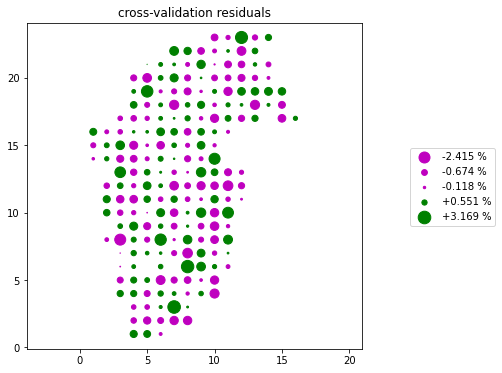

In [ ]:
# Résultat attendu ci-dessous...

- Affichez la distribution spatiale des erreurs standardisées calculées par validation croisée

In [56]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303037223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030372220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e4d203d20382023206e756d626572206f662062696e733c62723e0a62696e73203d205b6e702e7175616e74696c652863765f6f6b2e7a73636f72652c20692f284d2d31292920666f72206920696e2072616e676528302c4d295d3c62723e0a67726f75706564203d2063765f6f6b2e67726f75706279286e702e6469676974697a652863765f6f6b2e7a73636f72652c2062696e7329293c62723e0a6c6162656c73203d205b66277b693a2b2e33667d2720666f72206920696e2062696e735d3c62723e0a636f6c6f7273203d205b6920666f72206920696e2062696e735d3c62723e0a3c62723e0a66726f6d206d6174706c6f746c69622e636d20696d706f7274206765745f636d61703c62723e0a636d6170203d206765745f636d6170282762777227293c62723e0a3c62723e0a3c62723e0a6669672c206178203d20706c742e737562706c6f74732866696773697a653d28382c3629293c62723e0a666f7220692c20286e616d652c2067726f75702920696e20656e756d65726174652867726f75706564293a3c62723e0a2020202061782e736361747465722867726f75702e782c2067726f75702e792c20616c7068613d312e2c20633d636d6170285b28692d62696e735b305d292f2862696e735b2d315d2d62696e735b305d2920666f72206920696e2067726f75702e7a73636f72655d292c20636d61703d636d61702c206c6162656c3d6c6162656c735b695d293c62723e0a68616e646c65732c206c6162656c73203d2061782e6765745f6c6567656e645f68616e646c65735f6c6162656c7328293c62723e0a61782e636c65617228293c62723e0a61782e736361747465722878203d2063765f6f6b2e782c2079203d2063765f6f6b2e792c20633d63765f6f6b2e7a73636f72652c20636d61703d636d6170293c62723e0a61782e617869732827657175616c27293c62723e0a61782e7365745f7469746c65282763726f73732d76616c69646174696f6e207a2d73636f726527293c62723e0a6669672e6c6567656e642868616e646c65732c206c6162656c732c6c6f633d2763656e746572206c656674272c2062626f785f746f5f616e63686f723d28312c20302e3529290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


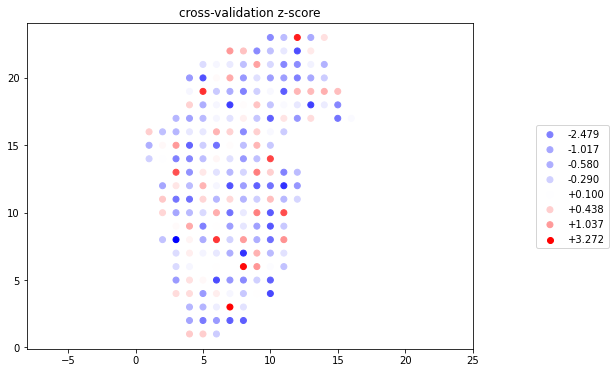

In [ ]:
# Résultat attendu ci-dessous...

- Calculez l'erreur quadratique moyenne, la moyenne de l’erreur de validation croisée et la moyenne des carrés des erreurs standardisées de validation
croisée

In [ ]:
# Résultat attendu ci-dessous...

Erreur quadratique moyenne : 0.9838 %
Moyenne de l’erreur de validation croisée : 0.0003 %
Moyenne des carrés des erreurs standardisées de validation croisée : 1.0235


***
<div class="alert alert-block alert-danger" align="center">
    <b>FIN DE LA CINQUIEME SEANCE</b>
</div>

***
## 6. Pour aller plus loin

- Observez l'effet d'un changement de variogramme (choix du modèle, effet de pépite, du palier) sur les estimations et les variances d'estimation des différents krigeages

- Observez l'effet du changement de la valeur de la moyenne sur les estimations et les variances d'estimation du krigeage simple